## Quantum key destribution and Quantum Cryptography

#### Code by Akash and Daniel 

Brief description of the code.
If you want to send a message over the internet but do not want anyone to hear your conversation, QKD is the solution.
Basically, QKD is about making the right information available to public keeping the important points private.
Here we deal with **Alice** who wants to send a secret message to **Bob**  

Required packages

In [1]:
import qiskit

#other useful packages
import math
import numpy as np
import matplotlib.pyplot as plt

# Import Qiskit
from qiskit import BasicAer, Aer, execute, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

Set backend as the qasm simulator (or the actual IBMQ hardware as per your choice).

In [2]:
# define backend from the simulator
backend = Aer.get_backend('qasm_simulator')

#one can use the actual IBMQ hardware
#for this use the backend as mentioned below with the appropriate token.
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-education')
#backend_ibmq = provider.get_backend('ibmq_16_melbourne') 

## Part 1: Define the message 

Enter a message that you would like to transmit to Bob. The default message is 'Hi'. The cell below takes the input message and defines the 'length of message' (slightly longer than the actual message). This will be useful to generate our key. The longer this len_message, the better (keep it 3x to be on the safe side).

In [3]:
# you are ALICE
# this block deals with the breaking of message into small chucnks, need small chunks if you have small number of qubits

#message = 'Hello' #used for debugging
message = input('Enter a short message (default message is "Hello") : ')
if len(message)<1:
    message = 'Hello'
print('The message to be sent is "', message,'"')


# initial size of encrypttion key, arbitary number to multiply so that len of string/key is longer than the actual message!
len_message = len(message)*3

Enter a short message (default message is "Hello") : 
The message to be sent is " Hello "


Define the number of qubits of the system that will be used to process. Since we need to generate a random string of binary numbers, we need to restrict it with the maximum available qubits. We then divide the message into chunks of maximum available qubits (default 1 qubits).

For transmitting the qubit from Alice and Bob, we need additionaly some qubits, in our case 3 or 5, depending on, wether we want to simulate quantum repeaters or not. The transmission happens via quantum teleportation.

In [4]:
# define number of qubits
num_qbits = 1

# break message into small chuncks with len <=5 (using 5 qubit systems)
break_message = []

# break the len_message into chunks of size 5 or less
for i in range(int(len_message/num_qbits)):
    break_message.append(num_qbits)
if len_message%num_qbits!=0:
    break_message.append(len_message%num_qbits)
    
# print the results
print('Key length = length of message', len_message)
print('The message is broken in to the following chuncks:',break_message) #shows how the message will be broken down

Key length = length of message 15
The message is broken in to the following chuncks: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


As you can see from the above step, the length of the message will be equal to length of the key, however this is subdivided into small bits (of size <5 bits), so that we can generate a 5 bit random binary string.

# The breakdown of the BB84 protocol (a simpler version)
* **Alice** wants to send the above message to **Bob** .

1) Alice will generate a random string of binary numbers whose length will be equal to the length of the message (or greater).

2) Alice will convert this string into corresponding qubits. But she will put them into a superposition before sending it to Bob

2.5) Alice and Bob each create a "rotation key". For Alice, it decides, whether she preapres her qubit in 0 or 1, for Bob it decides, whether he wants to apply an H-gate or not (see also 3 and 4). 

3) Alice will send this superposition to Bob.

4) Bob recievs this superposition and randomly inverses the superposition (depending on his "rotation key"). Then he measures the qubit.

5) Now, Alice and Bob will publicly share the "rotation key". If the key elements at the same position matches, the final key consists of the bits at the mentioned positions of Alice's random string (see 1) ) and Bob's measurment outcome.

6) Alice and Bob create their keys which will be used to encode message by Alice and decode the message at Bobs site.

## Define a function to generate a random string of binary digits 
 The input is size of the string that needs to be generated.
 
 The output is the random string of binary digits.

In [5]:
'''
generate a random key to encrypt the message
random string generator of str_len (the length of the string)
this generates the initial key as per the length of string
'''
#can change the backend here to run on actual hardware. Default in the qasm_simulator
#backend = provider.get_backend('ibmq_bogota')

def RandomStringG(str_len, circ, string_qRegister, string_clRegister):
    #n = str_len             # send parameter/argument
    op_str = '' # define a empty output string that will be returned
    # this will generate a circuit which will output a randomly 1s or 0s in chunks of 5 bits/units
    for j in range(temp_n):    
        circ.h(j)                    # H gate to make superposition of 1 and 0
        circ.measure(j,j)         # collapse the superposition
        
        op_str = list(execute (circ , backend, shots=1).result().get_counts(circ).keys())[0]  
    return op_str, circ

Alice will generate a random key called Initial Key. This will be used to generate the encryption key.

**Alice and Alice only will have this key.** (Initial Key) 

In [6]:
# define the quantum/classical register and quantum circuit

# we want to have qubits in chunks of 1, as we have a 5 quibit system, we can use the remaining 4qubits for transmission
temp_n = num_qbits
n      = len_message
key_Alice = ''

string_qRegister = QuantumRegister(temp_n, 'qRNG')       # create a Q register of size temp_n
string_clRegister = ClassicalRegister(temp_n, 'c')     # create a Classical Register
circ = QuantumCircuit(string_qRegister, string_clRegister)         # create a quantum circuit

# this is the initial key that Alice generates and will be used to generate the encryption and so on
for i in range(0, math.ceil(n/temp_n)): # consider the upper limit of the division
    # the second definition of the circuit is due to the fact that this circuit is running multiple times,
    # but we also want to show, how one of the circuits looks like
    circ = QuantumCircuit(string_qRegister, string_clRegister)
    key, circ = RandomStringG(len_message, circ, string_qRegister, string_clRegister) # store the random string in the variable key
    # execute and store/append the results  in op_str
    # generates a 5bit binary number randomly, as n=5
    key_Alice += key
    
#key_Alice = key_Alice[0:n]
print('Initial key (string): ', key_Alice)              # print key

Initial key (string):  000110111111110


Circuit to generate quantum random numbers.


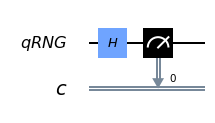

In [7]:
print('Circuit to generate quantum random numbers.')
circ.draw('mpl')

Now, Alice will generate a random string of binary numbers again. This will be transmitted to Bob

In [8]:
# generate a random string of binary digits which she will send to Bob
A_rot = ''

# like above
for i in range(0, math.ceil(n/temp_n)): # consider the upper limit of the division
    circ = QuantumCircuit(string_qRegister, string_clRegister)
    key, circ = RandomStringG(len_message, circ, string_qRegister, string_clRegister) # store the random string in the variable key
    A_rot += key

print('Rotation key (string): ', A_rot)

Rotation key (string):  111100000000110


Similarly, Bob will generate a random string. Bob will send this to Alice

In [9]:
# at the same time Bob will generate a random key which he will send to Alice
B_rot = ''

# like above
for i in range(0, math.ceil(n/temp_n)): # consider the upper limit of the division
    circ = QuantumCircuit(string_qRegister, string_clRegister)
    key, circ = RandomStringG(len_message, circ, string_qRegister, string_clRegister) # store the random string in the variable key
    B_rot += key


print('Rotation key (string): ', B_rot)

Rotation key (string):  010110110110110


Now both Alice and Bob have generated and shared their rotation keys.

Now, Alice uses this **Alice's Rotation Key**. She wants to a send a superposition of qubits to Bob. For that first she checks if the bit is 0, then she will prepare a qubit on the negative z axis. If the bit is one, she will prepare a qubit on the positive z axis. This is done by an X gate.

Furthermore, Alice checks that if it is a 1 bit, she will rotate the qubit using an H gate.

Now she sends this superposition to Bob.

He will take this and rotate it in the opposite direction with an H gate. After that Bob measures the qubit and records the result, this is stored in Bob_result.

*If a third party observes this superposition, the key/state will be broken and Bob and Alice will know!*

#### Note: Only Alice's Rotation Key and Bob's Rotation Key are public


Next, the quantum communication happens. Alice uses her private string and modifies it according to her "rotaion key" to deifine a qubit in superposition, before sending it through the quantum channel to Bob.

Therefore, some functions preparing the channel are defined in the following.

* Define the teleportation function, the function which will generate the repeater circuit. Similarly one for no_repeater. Finally we define how the superposiiton of the qubit is formed and transmitted in the function called 'quantum_channel' 

In [10]:
def teleportation(circ, qReg, clReg, a0, a1, b2):
    '''
    instead of distributing the entangled pair of qubits, what is not possible using qiskit,
    the initial state we want to teleport is transmitted classically to this circuit and initialized
    '''
    
    # Alice wants to measure in the computational basis
    circ.cx(a0, a1)
    circ.h(a0)
    circ.barrier() # put a barrier
    
    # if using real hardware, the measurment cannot be done, when more gates are used afterwards
    circ.cz(a0, b2)
    circ.cx(a1, b2)

    return circ

In [11]:
def repeater(circ, qReg, clReg, a, b, c, d):
    '''
    since qiskit does not support distributing entangled pair of qubits (see also in teleportation()),
    the repeaters, using the entanglement swapping, are simulated on a single quantum register
    '''
    
    # prepare two entangled pair of qubits
    # first pair
    circ.h(a)
    circ.cx(a, b)
    
    # second pair
    circ.h(c)
    circ.cx(c, d)
    
    # barrier
    circ.barrier()
    
    # Alice has qubit a, Charlotte has qubit b and c, and Bob has qubit d
    # teleport Charlotte's first qubit to Bob
    circ = teleportation(circ, qReg, clReg, b, c, d)
    
    return circ

In [12]:
def no_repeater(circ, qReg, clReg, a, b, c, d):
    
    # entangle
    circ.h(a)
    circ.cx(a,d)
    
    return circ

The code is multipurpose code, if you need the code to run with repeaters, keep the need_repeater bool as true. If you do not need repeaters, change it to false

Now, consider the situation with the repeater.

In [13]:
#if true then repeaters will act on the circuit
#if false no repeaters will be included
need_repeater = True

In [14]:
def quantum_channel(repeaterCircuit, repeaterRegister, repeater_cRegister, backend, i, j, k):
    # before sending it rotate it randomly into a superposition

    # the first part will be on Alice's side and the second at Bobs

    # loop to read each bit of all the above variables
    #for i,j,k,n in zip(temp_key,A_r_temp,B_r_temp,range(0,len(temp_key))):
    # send qubits one by one over the quantum channel
    # this will run at Alice's side
    # preparing initial state
    
    i = int(i) # convert to int from string, can be 0 or 1
    j = int(j)
    if i>0:
        repeaterCircuit.x(0) # if bit is 0 prepare a qubit on the negative z axis, If 1 prepare a qubit on the positive z axis, X gate
    if j>0:
        repeaterCircuit.h(0) # 1 in alice's rotate string, she rotates the key qubit with a Hadamard gate, practically, alice should send this state to BOB

    if need_repeater:
    # prepare quantum repeaters
        repeaterCircuit = repeater(repeaterCircuit, repeaterRegister, repeater_cRegister, 1, 2, 3, 4)
    
    if not need_repeater:
    # no repeater #uncomment the line below to get results without repeater
        repeaterCircuit = no_repeater(repeaterCircuit, repeaterRegister, repeater_cRegister, 1, 2, 3, 4)
    
    # put a barrier
    repeaterCircuit.barrier()

    # teleport Alice qubit
    repeaterCircuit = teleportation(repeaterCircuit, repeaterRegister, repeater_cRegister, 0, 1, 4)

    # techinically create a superposition here and send it to Bob, (Physically transport the superposition to bob)
    # Bob receives it and rotates it in the inverse diraection

    k = int(k)
    if k>0:
        repeaterCircuit.h(4)   # this H gate rotates the bit

    # to break the superpositon, Bob measures it
    repeaterCircuit.measure(4, 0)
    
    return repeaterCircuit

In [15]:
 def execute_and_get_result(circ_list, backend, shots=1):
    # execute and send a string called Bob_results
    job = execute(circ_list, backend=backend, shots=shots)
    results = job.result()
    answer = results.get_counts()
    
    Bob_result = ''
    Bob_result += list(answer.keys())[0]
    
    return Bob_result

In [16]:
# error mitigation
# simulate the circuits more often, to perform a majority vote

def execute_error_mitigation(circ_list, backend=Aer.get_backend('qasm_simulator'), shots=3):
    # execute
    job = execute(circ_list, backend=backend, shots=shots)
    results = job.result()
    answer = results.get_counts()
    
    #print(answer)
    # empty string for saving results later on
    res = ''
    
    #for i in range(0, len(answer)):
        # get keys and values from the dictionary
    keys   = list(answer.keys())
    values = list(answer.values())

        # if there is only one key element, then there is no majority vote, since it is clear,
        # which qubit is sent
    if len(keys)==1:
        res += keys[0]
        # else decide which qubit 0 or 1 has more shots
    else:
        if (values[0] >= values[1]):
            res += keys[0]
        else:
            res += keys[1]
    
    return res #returns the value with maximum probability, this is used to construct Bob_result with error mitigation

If the error mitigation bool is left as true, three shots will be fired per circuit and the one with the highest probability will be seelcted. If its false, only one shot will be fired and the key will be generated.

In [17]:
need_error_mitig = True
#if true, will carry out error mitigation
#if false, will not carry out 

In [18]:
Bob_result = '' # Bob will store his results here
Bob_result_err_mit=''

circ_list = [] #to send to actual hardware

#if its needed you can run this code on actual IBM hardware
backend = Aer.get_backend('qasm_simulator')
#backend = provider.get_backend('ibmq_5_yorktown')

# prepare circuit
Alice_qubitRegister = QuantumRegister(1, 'alice qubit')
repeaterRegister = QuantumRegister(4, 'repeater')
repeater_cRegister = ClassicalRegister(1, 'c')


for i,j,k in zip(key_Alice, A_rot, B_rot):
    repeaterCircuit = QuantumCircuit(Alice_qubitRegister, repeaterRegister, repeater_cRegister)
    repeaterCircuit = quantum_channel(repeaterCircuit, repeaterRegister, repeater_cRegister, backend, i, j, k)
    
    #if using actual hardware comment the line below
    #just need to send a list of circuits
    if not need_error_mitig:
        Bob_result += execute_and_get_result(repeaterCircuit, backend=Aer.get_backend('qasm_simulator'))
        
    if need_error_mitig:
    #print(repeaterCircuit) #for visualisation 
        Bob_result_err_mit+=execute_error_mitigation(repeaterCircuit, backend=Aer.get_backend('qasm_simulator'), shots=5)
    
    
    circ_list.append(repeaterCircuit)

The circ_list can be used to send to the actual hardware when required.

if one needs to execute this code on the actual quantum hardware, they can create a list of circuits and execute this list with or without the error mitigation process. One can create a list of 75 circuits.

In [19]:
#if using actual hardware uncommend the line below to get the executed results
#Bob_result = execute_and_get_result(circ_list, backend=provider.get_backend('ibmq_5_yorktown'))

In [20]:
if need_error_mitig:
    print("Bob's result by error mitigation:", Bob_result_err_mit ) # this is Bobs observation with error mitigation
else:
    print("Bob's results:                  :", Bob_result)      # this is Bobs observation without error mitigation


Bob's result by error mitigation: 001110011001110


Now we have generated Bob's key/results. Now we can move on the actual key generation process.

A quick look at a circuit from circ_list

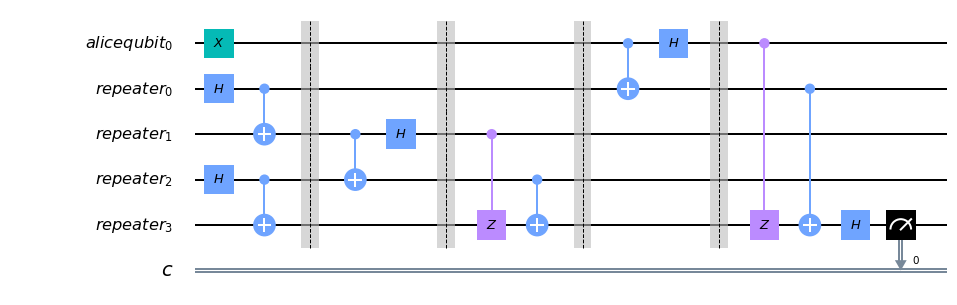

In [21]:
# show one circuit
circ_list[4].draw('mpl')

For error mitigation, send a qubit through the same circuit a couple of times (say 5) and choose the measurement that has the heighest probability of occurance. By this it is most likely to construct the correct key by both parties

The above mentioned string is Bobs observation of the Superposition. **This belongs to Bob and Bob only**

Now, Alice and Bob has shared their random strings with one and another and Bob has observed the qubits that were in superposition (sent by Alice.)

Given the public information i.e. Rotation Keys, Alice and Bob will generate a secret quantum encryption/decryption key.
If a bit in Alice's rotation string is the same as the corresponding bit in Bob's they know that Bob's result is the same as what Alice sent.

(In brief, both the keys should be the same) (Alice based on her original key/Initial Key and Bob based on his measured results/Bob_results).

In [22]:
#using the public data i.e. Bobs and Alices rotation keys
#if a bit in the rotated string is the same in both alice and bobs string! voila, keep this and generate the whole key

#check for one - one correspondence in the 
def KeyGen(rot_1,rot_2,results):
    key = ''
    count = 0
    for i,j in zip(rot_1,rot_2):
        if i == j:
            key += results[count]
        count += 1
    return key

In [23]:
A_key = KeyGen(B_rot,A_rot,key_Alice)
print("Alice's key:",A_key)

Alice's key: 01011110


In [24]:
if need_error_mitig:
    B_key =KeyGen(B_rot,A_rot,Bob_result_err_mit)
else:
    B_key =KeyGen(B_rot,A_rot,Bob_result)
print("Bob's key:  ",B_key)

Bob's key:   01011110


In [25]:
#when using on the actual hardware, one can keep a track of the times the actual key was generated using this fuction
def check_for_same_key():
    # set a counter for the right, wrong results
    #counter_right = 0
    #counter_wrong = 0

        # check wether key is match
    if A_key == B_key:
        print('The key is a match!')
        #counter_right += 1
    else:
        print('Error, Key not matched')
        #counter_wrong += 1

check_for_same_key()

The key is a match!


In theory the keys should be a perfect match, if they were not, someone tried to evesdropped on your superpositon.

But in reality, due to the noise added by the circuits is large and we do not always get the same key for Alice and Bob. 

Now we have a secure key that no one knows, we can use **THIS** key to encrypt and decrypt messages

In [26]:
#encoding
#alice will encode a message with the above mentioned key

#shorten the key as it is longer and we have added extra digits at the end
short_A_key = A_key[:len(message)]
encoded_mess =''     #define a empty string to store the encrypted message

#encrypt it to produce a encrypted message
for letter_mes,int_key in zip(message,short_A_key):
    encd_char = chr (ord(letter_mes) + (10+ord(int_key))%256)  # basically shifts the ord(k) by 10 units (in ASCII) # can use any other encryption methods.
    encoded_mess += encd_char
print('Encoded message :', encoded_mess)

#send this encoded message to bob

Encoded message :  ¦§ª


In [27]:
#to decrypt
#Bob will use his key (which should be the same) to break the encryption
short_B_key = B_key[:len(message)]
decoded_mess =''
for letter_mes,int_key in zip(encoded_mess,short_B_key):
    decd_char = chr (ord(letter_mes)-(10+ord(int_key))%256)  # basically shifts the ord(k) by 10 units (in ASCII)
    decoded_mess += decd_char
print('Decoded message: ',decoded_mess)

Decoded message:  Hello


The overall idea is to use error mitigation and keep a check on how many number of times the actual key was geneated. This is presented in the report provided in the same folder as this jupyter notebook.